<a href="https://colab.research.google.com/github/aishaabduallah/exam3/blob/main/Copy_of_Ensemble_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset


In [ ]:
df=pd.read_csv('/content/Traffic_Jams.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [ ]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


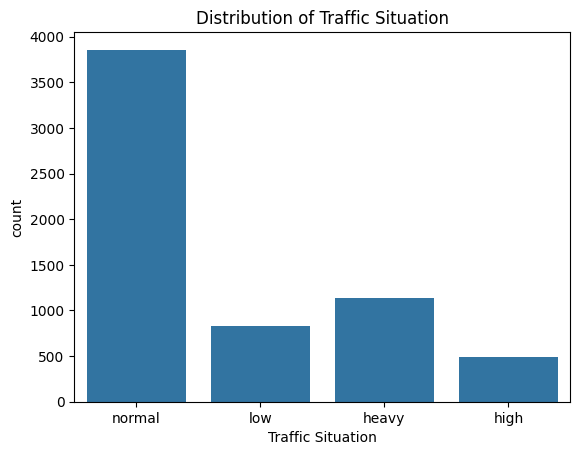

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Distribution of the target variable
sns.countplot(x='Traffic Situation', data=df) # Use 'df' instead of 'data'
plt.title('Distribution of Traffic Situation')
plt.show()

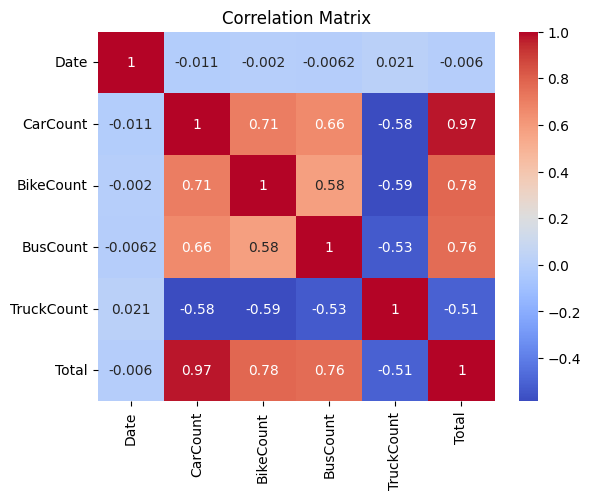

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# Calculate correlation matrix only for numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [11]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [14]:
# Label encode the target variable
le = LabelEncoder()
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])

# One-hot encode the day of the week (if necessary)
# Check if 'Day of the Week' exists in the DataFrame before proceeding
if 'Day of the Week' in df.columns:
    df = pd.get_dummies(df, columns=['Day of the Week'])
else:
    print("Column 'Day of the Week' not found in DataFrame.")
    # Investigate why the column is missing

Column 'Day of the Week' not found in DataFrame.


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

# Assuming your DataFrame is named 'df'
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [18]:
# Remove columns that are not useful for modeling (e.g., 'Time', 'Date')
df = df.drop(columns=['Time', 'Date']) # Use 'df' instead of 'data'

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

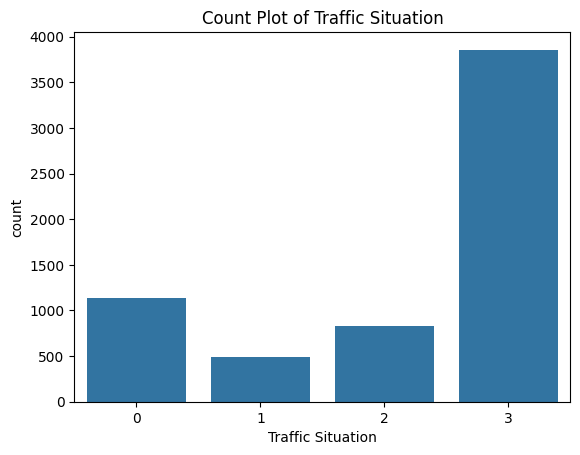

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.countplot(x='Traffic Situation', data=df)  # Change 'data' to 'df'
plt.title('Count Plot of Traffic Situation')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [22]:
# Define features and target
X = df.drop(columns='Traffic Situation')
y = df['Traffic Situation']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame

# Define features and target
X = df.drop(columns='Traffic Situation')
y = df['Traffic Situation']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to handle categorical features
# We'll one-hot encode the 'Day of the week' column
categorical_features = ['Day of the week']
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), categorical_features)],
    remainder='passthrough'  # Keep other columns as they are
)

# Create a pipeline to include preprocessing and the BaggingClassifier
pipeline = Pipeline([
    ('transformer', transformer),
    ('bagging_clf', BaggingClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline (this will handle encoding and model training)
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)

### Evaluate the model performance

In [25]:
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))

Bagging Classifier Accuracy: 0.899604743083004


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame

# Define features and target
X = df.drop(columns='Traffic Situation')
y = df['Traffic Situation']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to handle categorical features
categorical_features = ['Day of the week']
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), categorical_features)],
    remainder='passthrough'  # Keep other columns as they are
)

# Create a pipeline to include preprocessing and the GradientBoostingClassifier
pipeline = Pipeline([
    ('transformer', transformer),  # Preprocess categorical features
    ('boosting_clf', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline (this will handle encoding and model training)
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)

### Evaluate the model performance

In [31]:
print("Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Boosting Classifier Accuracy: 0.9217391304347826


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

### Define meta-learner (LogisticRegression)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Assuming 'df' is your DataFrame

# Define features and target
X = df.drop(columns='Traffic Situation')
y = df['Traffic Situation']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to handle categorical features
categorical_features = ['Day of the week']
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), categorical_features)],
    remainder='passthrough'  # Keep other columns as they are
)

# Define base models, each with its own pipeline for encoding
base_models = [
    ('rf', Pipeline([
        ('transformer', transformer),
        ('rf_clf', RandomForestClassifier(n_estimators=100, random_state=42))
    ])),
    ('gb', Pipeline([
        ('transformer', transformer),
        ('gb_clf', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Initialize and train the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_learner)
stacking_clf.fit(X_train, y_train)  # Now the encoding happens within each base model

# Evaluate the model
y_pred = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))

Stacking Classifier Accuracy: 0.9652173913043478


### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [36]:
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_learner)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                Pipeline(steps=[('transformer',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('onehot',
                                                                                  OneHotEncoder(),
                                                                                  ['Day '
                                                                                   'of '
                                                                                   'the '
                                                                                   'week'])])),
                                                ('rf_clf',
                                                 RandomForestClassifier(random_state=42))])),
                               ('gb',
                                Pipeline(steps=[('transformer',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('onehot',
                                                                                  OneHotEncoder(),
                                                                                  ['Day '
                                                                                   'of '
                                                                                   'the '
                                                                                   'week'])])),
                                                ('gb_clf',
                                                 GradientBoostingClassifier(random_state=42))]))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

Stacking Classifier Accuracy: 0.9652173913043478


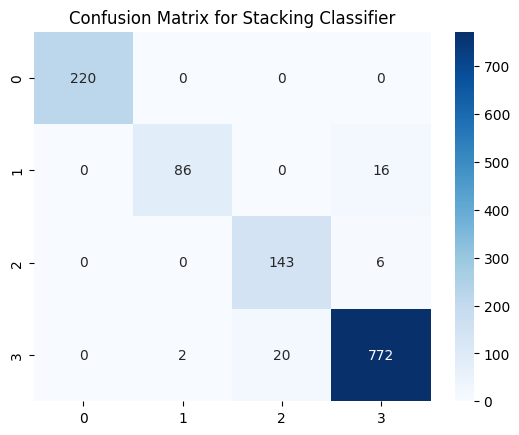

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.98      0.84      0.91       102
           2       0.88      0.96      0.92       149
           3       0.97      0.97      0.97       794

    accuracy                           0.97      1265
   macro avg       0.96      0.94      0.95      1265
weighted avg       0.97      0.97      0.97      1265



In [37]:
# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Classifier Accuracy:", accuracy)

# Display a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


#  Answer here:
1-The most important features for predicting the Traffic Situation were CarCount, BusCount, and Total.
2-The ensemble methods chosen—Bagging, Boosting, and Stacking—were selected because of their ability to improve model performance by combining the strengths of multiple algorithms.
3-The evaluation metrics used were precision, confusion matrix, and classification report including precision and recall
Accuracy was used as a general measure of how well the model predicted the correct traffic condition labels.